## Imports

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

## Load the Dataset

In [5]:
df =  pd.read_csv('cancer_ml_prediction.csv')
df.head()

,thickness,size,shape,adhesion,single,nuclei,chromatin,nucleoli,class
0,5,1,1,1,2,1.0,3,1,0
1,5,4,4,5,7,10.0,3,2,0
2,3,1,1,1,2,2.0,3,1,0
3,6,8,8,1,3,4.0,3,7,0
4,4,1,1,3,2,1.0,3,1,0


### Check for imbalance in the Target

In [11]:
df['class'].value_counts()

class
0    458
1    241
Name: count, dtype: int64

## Split the data into Training and Testing Sets

In [17]:
X = df.drop('class', axis=1)
y = df['class']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

## Create Preprocessor to Standardize the Training Data

In [28]:
preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])

## Create a model pipeline

In [31]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

## Define a Parameter Grid

In [34]:
parameter_grid = {
    'classifier__n_estimators': [50,100],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2,5]
}

## Perform GridSearch Cross-Validation and fit the Model to the training data

In [41]:
# Cross-validation method
cv = StratifiedKFold(n_splits=5, shuffle=True)

In [47]:
model = GridSearchCV(estimator=pipeline, param_grid=parameter_grid, cv=cv, scoring='accuracy', verbose=2)
model.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.1s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        Pipeline(steps=[('imputer',
                                                         SimpleImputer(strategy='median')),
                                                        ('scaler',
                                                         StandardScaler())])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [50, 100]},
             scoring='accuracy', verbose=2)

In [49]:
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        95
           1       0.98      0.93      0.95        45

    accuracy                           0.97       140
   macro avg       0.97      0.96      0.97       140
weighted avg       0.97      0.97      0.97       140



Class 0

Precision: 0.97
When the model predicted class 0, it was correct 97% of the time.

Recall: 0.99
Out of all actual class 0 records, the model successfully found 99% of them.

F1-score: 0.98
A strong balance between precision and recall.

Support: 95
You had 95 actual samples of class 0.

Interpretation: The model is very good at identifying class 0. Almost perfect recall — it rarely misses them.

Class 1

Precision: 0.98
When the model predicted “this is class 1,” it was correct 98% of the time. Strong!

Recall: 0.93
Out of all actual class 1 cases, it caught 93%.
So it missed about 7% of true class 1 instances.

F1-score: 0.95
Still excellent. Slightly lower because recall dipped.

Support: 45
Only 45 examples of class 1 exist — less data often makes improvement harder.

Interpretation: The model is accurate with class 1, but occasionally fails to identify them (lower recall).

Overall Metrics
Accuracy: 0.97

The model correctly predicted 97% of all 140 samples.
Solid performance across the board.

Macro Average

Simple average across the two classes

Precision: 0.97, Recall: 0.96, F1: 0.97

This treats both classes equally and shows balanced performance.

Weighted Average

Weighted by the number of samples in each class

Precision: 0.97, Recall: 0.97, F1: 0.97

Because class 0 has more samples, its strong scores slightly lift the weighted average.

## Plot the Confusion Matrix

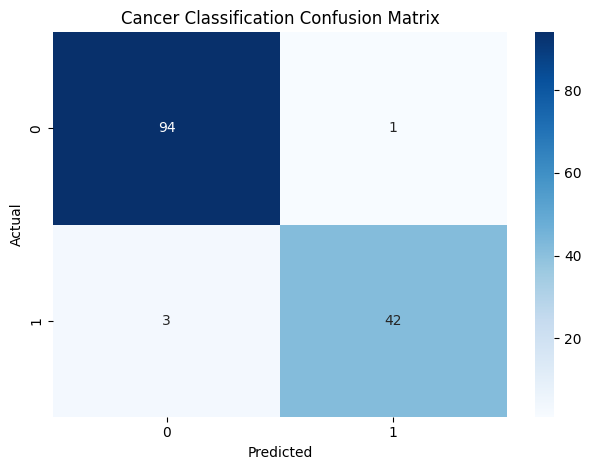

In [58]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

#Set the titles and details
plt.title('Cancer Classification Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

There are _94 True Negatives (Benign cases)_, _3 False Negatives (thought to be benign but are actually malignant)_, _42 True Positives (Predicted to be malignant and actually turned out to be so)_ and _1 False Positive (thought to be malignant but turned out to be benign)_

## Feature Importances

In [62]:
feature_importances = model.best_estimator_['classifier'].feature_importances_

In [66]:
feature_names = X_train.columns.tolist()

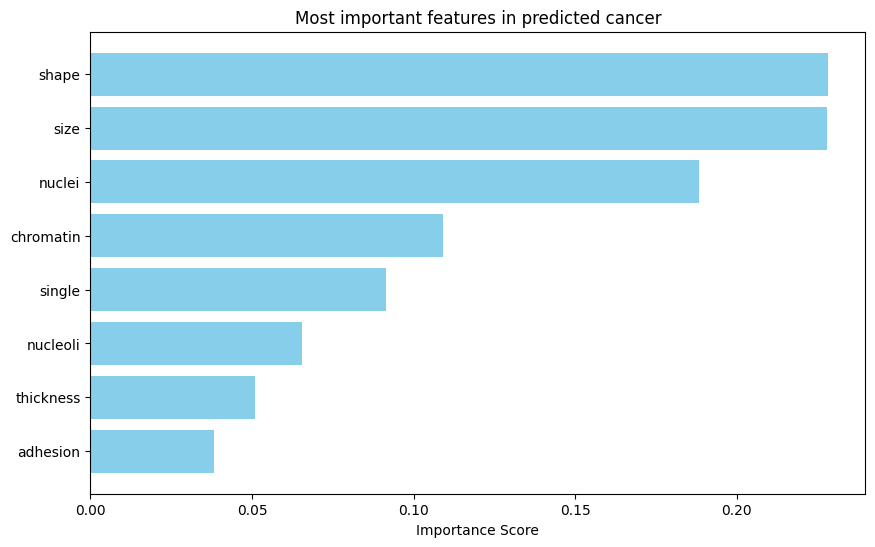


Test accuracy: 97.14%


In [70]:
importance_df = pd.DataFrame({'Feature':feature_names,
                              'Importance':feature_importances
                             }).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'],importance_df['Importance'],color='skyblue')
plt.gca().invert_yaxis()
plt.title('Most important features in predicted cancer')
plt.xlabel('Importance Score')
plt.show()

test_score = model.score(X_test, y_test)
print(f'\nTest accuracy: {test_score:.2%}')

## Logistic Regression

In [74]:
# Replace RandomForestClassifier with LogisticRegression
pipeline.set_params(classifier=LogisticRegression(random_state=42))

#update the model's estimator to use the new pipeline
model.estimator = pipeline

#Define a param_grid with LogisticRegression Parameters
param_grid = {'classifier__solver':['liblinear'],
              'classifier__penalty':['l1','l2'],
              'classifier__class_weight':[None, 'balanced']
             }

model.param_grid = param_grid

#fit the updated pipeline with LogisticRegression
model.fit(X_train, y_train)

#make predictions
y_pred = model.predict(X_test)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.1s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=No

## Display the Classification Report

In [77]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        95
           1       0.98      0.93      0.95        45

    accuracy                           0.97       140
   macro avg       0.97      0.96      0.97       140
weighted avg       0.97      0.97      0.97       140



## Display the Confusion Matrix

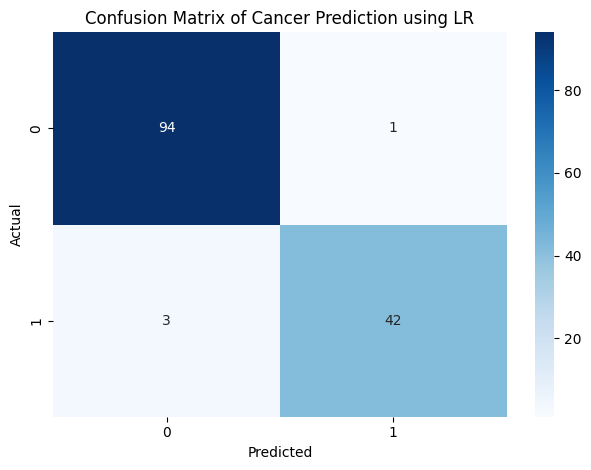

In [80]:
conf_matrix = confusion_matrix(y_test,y_pred)

sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix of Cancer Prediction using LR')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

There are 94 True Negatives (Benign cases), 3 False Negatives (thought to be benign but are actually malignant), 42 True Positives (Predicted to be malignant and actually turned out to be so) and 1 False Positive (thought to be malignant but turned out to be benign)

### Extract the Logistic Regression Feature Coefficients and Plot their Magnitudes in a Bar Chart

In [85]:
coefficents = model.best_estimator_.named_steps['classifier'].coef_[0]

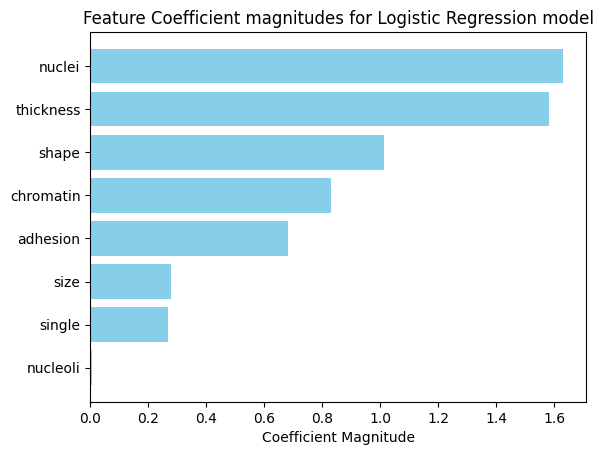


Test Score: 97.14%


In [87]:
coefficients_df = pd.DataFrame({'Features':feature_names,
                                'Coefficients':coefficents
                               }).sort_values(by='Coefficients',ascending=False, key=abs)

plt.figure()
plt.barh(coefficients_df['Features'],coefficients_df['Coefficients'].abs(), color='skyblue')
plt.gca().invert_yaxis()
plt.title('Feature Coefficient magnitudes for Logistic Regression model')
plt.xlabel('Coefficient Magnitude')
plt.show()

test_score = model.best_estimator_.score(X_test, y_test)
print(f'\nTest Score: {test_score:.2%}')

## KNN

In [105]:
pipeline = Pipeline([
    ('classifier', KNeighborsClassifier())
])

param_grid = {'classifier__n_neighbors': [3,5,7,9,11,15],
              'classifier__weights':['uniform','distance'],
              'classifier__metric': ['minkowski','euclidean','manhattan'],
              'classifier__p': [1,2],
              'classifier__algorithm': ['auto']
             }

model = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=cv, n_jobs=1)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

### Display Classification report

In [108]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        95
           1       0.98      0.93      0.95        45

    accuracy                           0.97       140
   macro avg       0.97      0.96      0.97       140
weighted avg       0.97      0.97      0.97       140



### Display Confusion Matrix

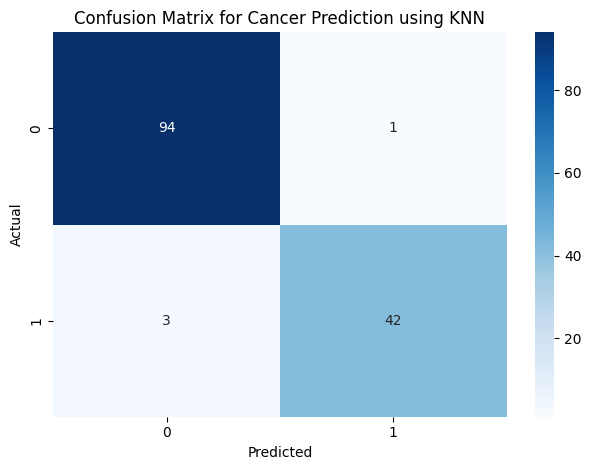

In [113]:
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix for Cancer Prediction using KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

### Using Permutation Importance to Predict Feature Importances

In [116]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model, X_test, y_test)
importances = result.importances_mean

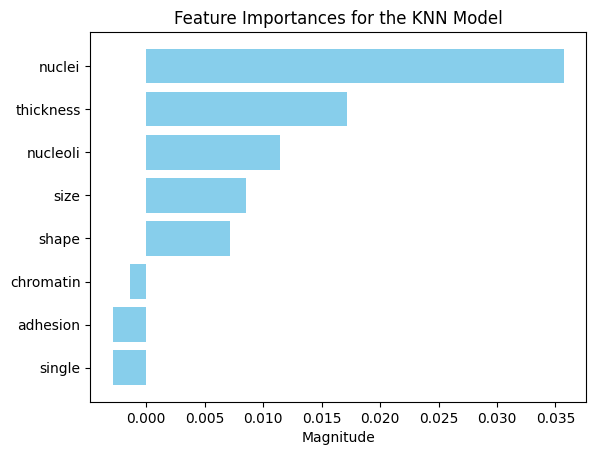


Test Score: 97.14%


In [120]:
importances_df = pd.DataFrame({'Features':feature_names,
                               'Importances':importances
                              }).sort_values(by='Importances', ascending=False)

plt.barh(importances_df['Features'],importances_df['Importances'], color='skyblue')
plt.gca().invert_yaxis()
plt.title('Feature Importances for the KNN Model')
plt.xlabel('Magnitude')
plt.show()

test_score = model.score(X_test, y_test)
print(f'\nTest Score: {test_score:.2%}')